In [118]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model,dummy,metrics
#from inspect import signature
#from sklearn.externals import joblib

In [119]:
df=pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [120]:
df.shape

(30, 17)

In [121]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [123]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [124]:
# Exploring the Data variable
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [125]:
df.W.value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

In [126]:
s=(df.dtypes=="object")
obj_col=list(s[s].index)
print("catagorical varible")
print(obj_col)

catagorical varible
[]


<AxesSubplot:>

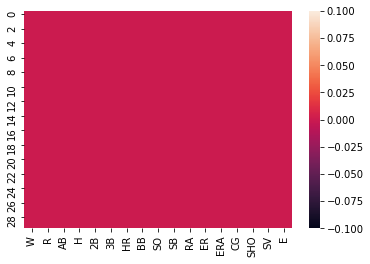

In [127]:
sns.heatmap(df.isnull())

In [128]:
# To check the correlation
dscor=df.corr()
dscor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

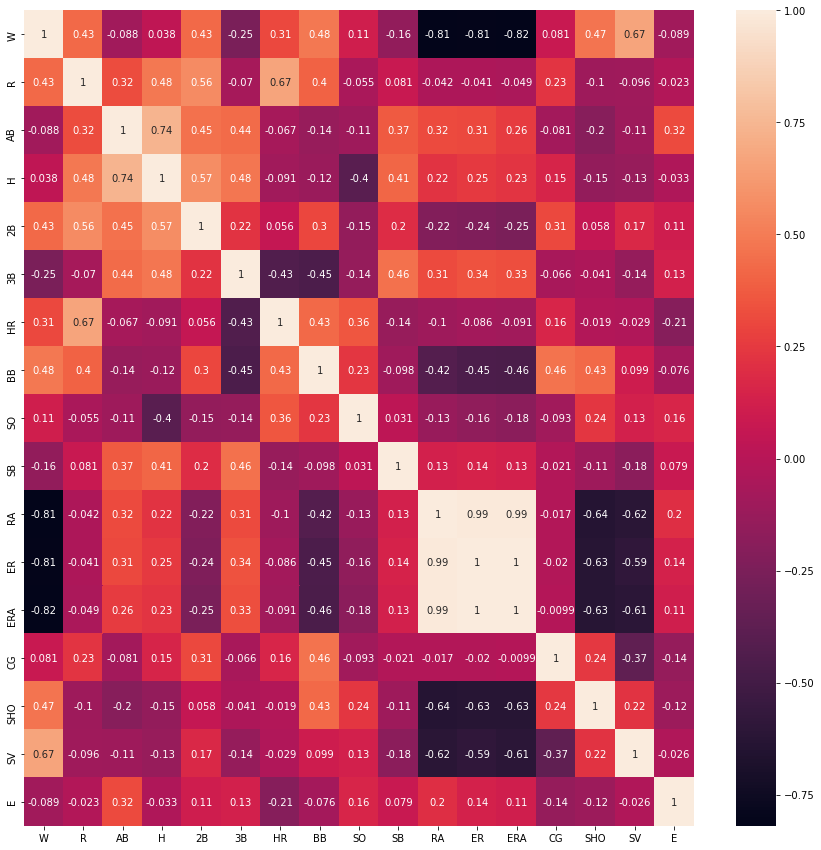

In [129]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='Frequency'>

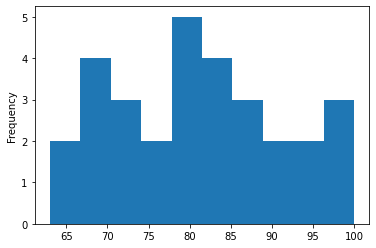

In [130]:
df['W'].plot.hist()

C:\Users\jesus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='W', ylabel='Density'>

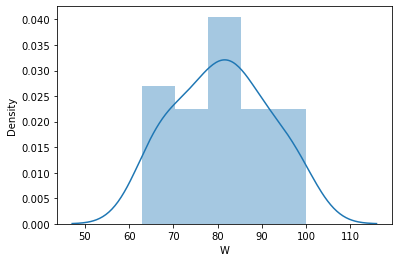

In [131]:
sns.distplot(df['W'])

C:\Users\jesus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jesus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jesus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

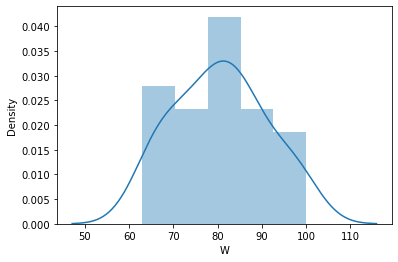

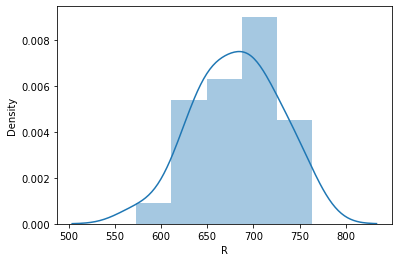

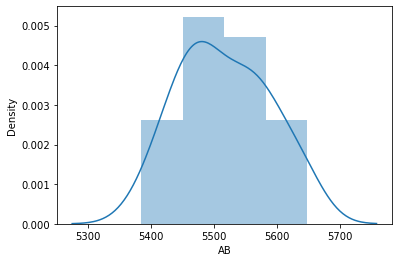

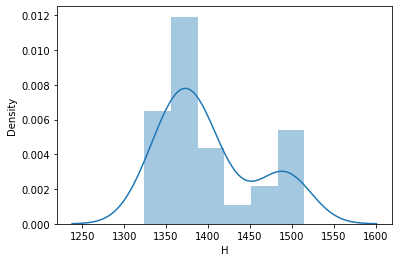

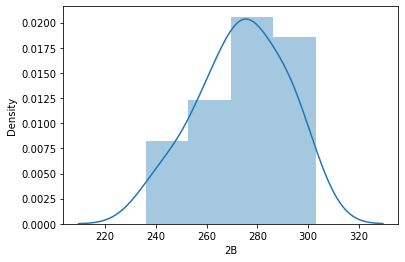

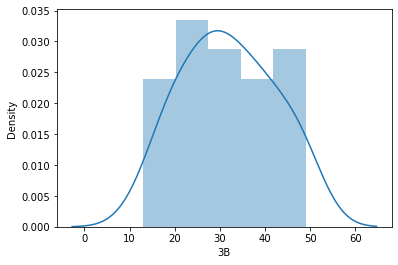

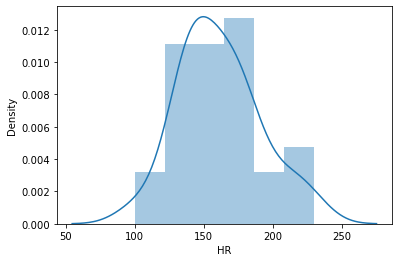

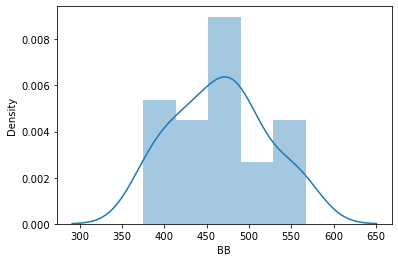

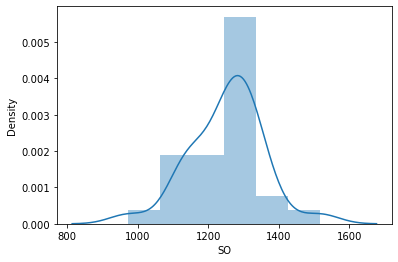

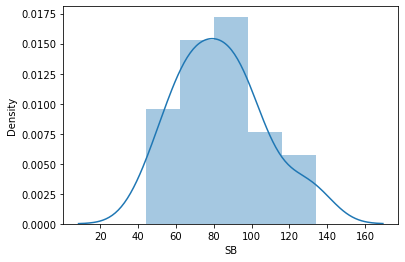

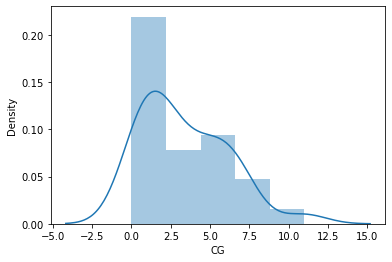

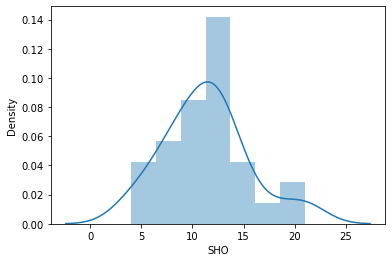

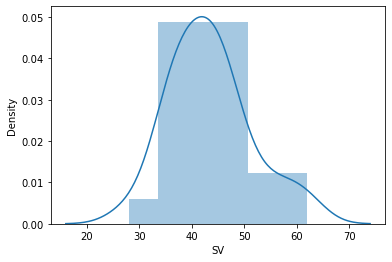

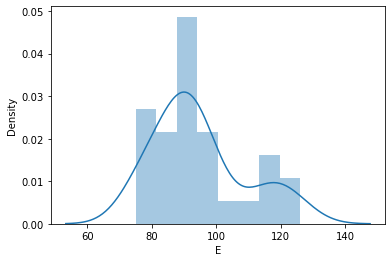

In [183]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

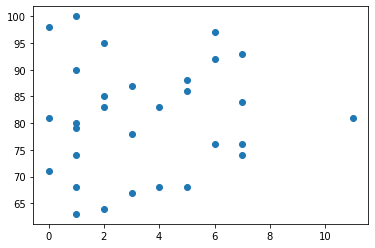

In [133]:
plt.scatter(df['CG'],df['W'])

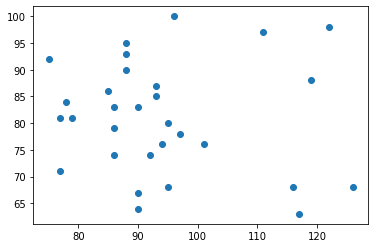

In [134]:
plt.scatter(df['E'],df['W'])

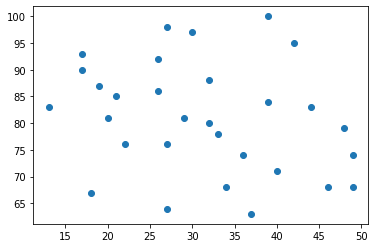

In [135]:
plt.scatter(df['3B'],df['W'])

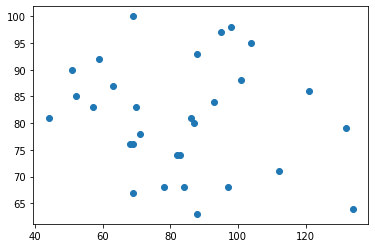

In [136]:
plt.scatter(df['SB'],df['W'])

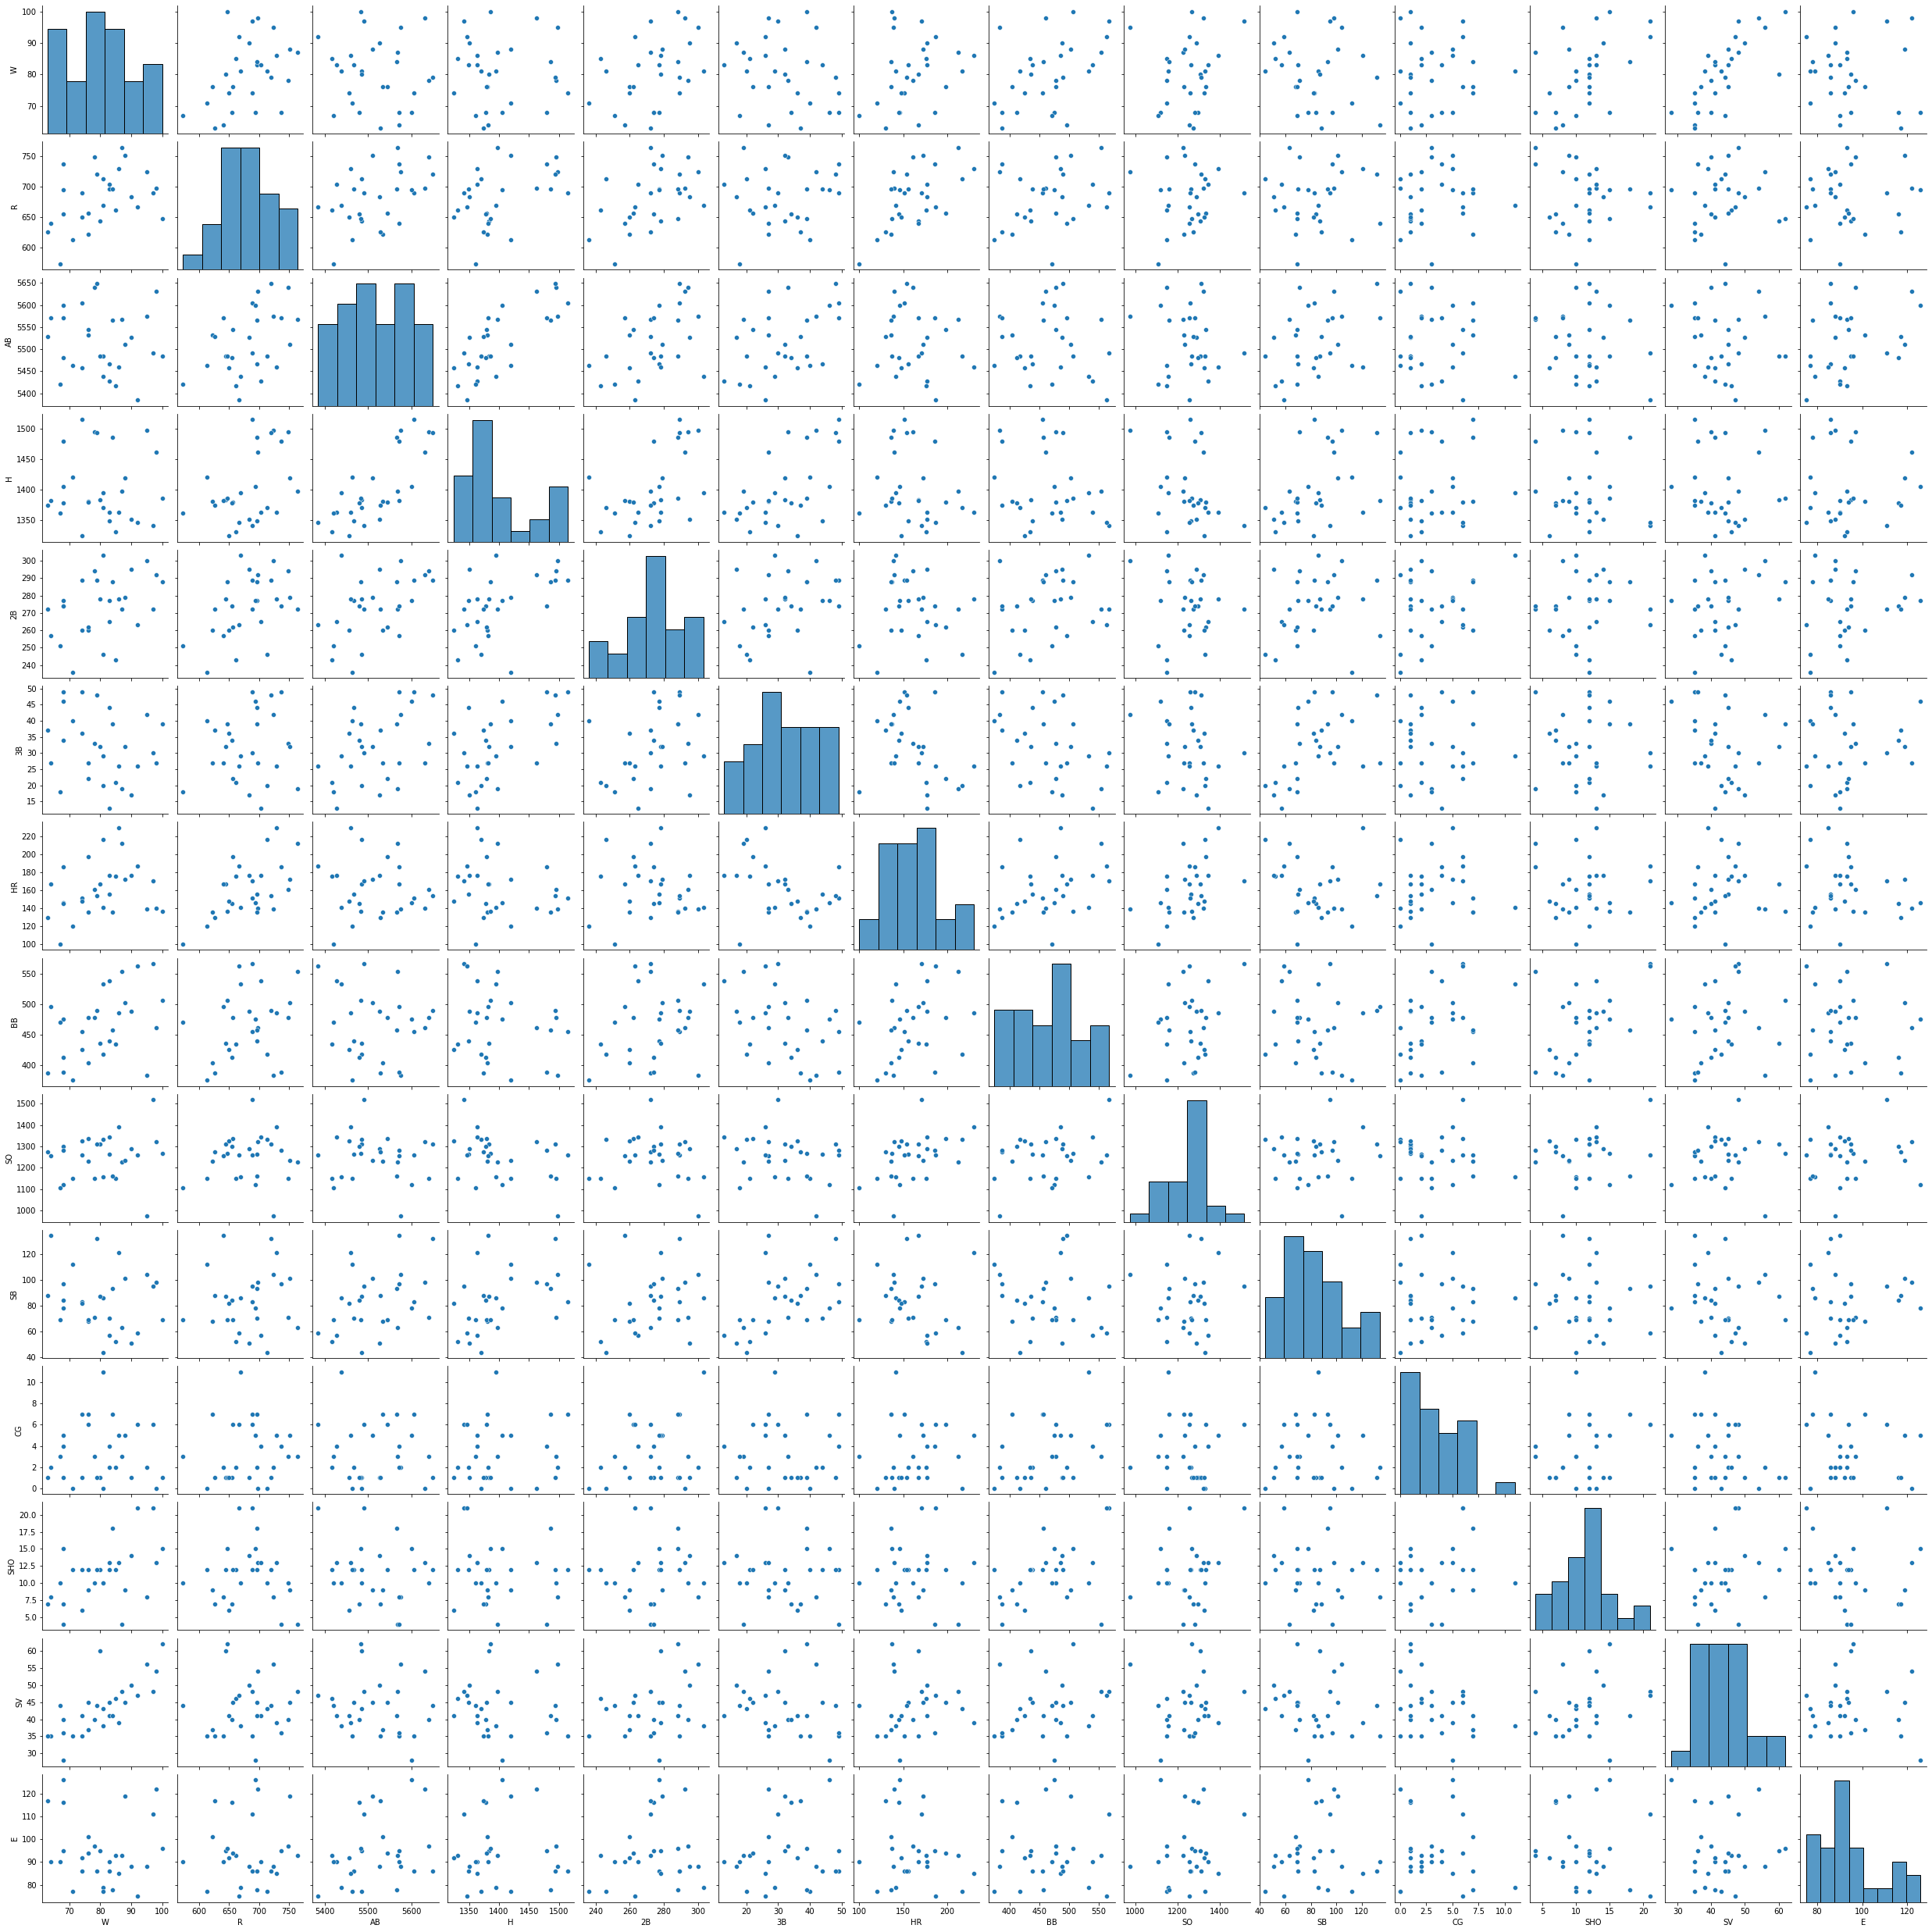

In [184]:
sns.pairplot(df)

In [138]:
#scaling down using standardscaler
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x = sc.fit_transform(X)
#x

In [139]:
#Lets check the null values without using visualization
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [140]:
df.shape

(30, 17)

In [141]:
collist=df.columns.values
ncol=12
nrows=10

In [142]:
#scaling down using standardscaler
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x = sc.fit_transform(X)
#x

C:\Users\jesus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jesus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\jesus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jesus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

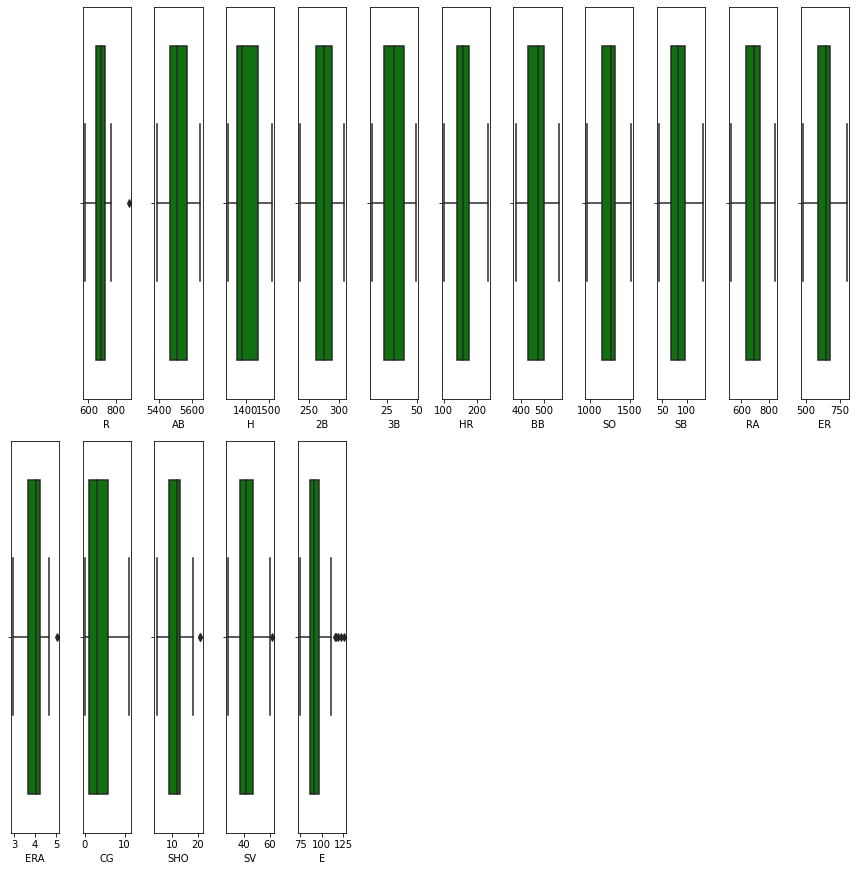

In [143]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()


In [144]:
#sns.pairplot(df)

In [145]:
# Drop the negatively correlated values
df.drop('RA',axis=1,inplace=True)

In [146]:
df.drop('ER',axis=1,inplace=True)

In [147]:
df.drop('ERA',axis=1,inplace=True)

In [148]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


In [149]:
df.shape

(30, 14)

In [150]:
# Removing the Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 5.39806195e-01, 8.14628593e-01,
        1.67160651e+00, 4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 5.39806195e-01, 1.72800005e-01,
        2.49879323e-01, 6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 2.77264091e+00, 3.20914294e-01,
        6.54856158e-01, 1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.01088140e-01,
        8.28122030e-01, 4.18423371e-01, 8.83180700e-01, 1.16053598e+00,
        1.68601848e-01, 6.90984928e-01, 1.30044220e+00, 5.67771443e-01,
        7.841

In [151]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [152]:
z[13][8]

0.8606536207726614

In [153]:
z[15][9]

0.6464052549051131

In [154]:
z[29][12]

0.913352009894743

In [155]:
df_new=df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,5,9,45,119


In [156]:
df.shape

(30, 14)

In [157]:
df_new.shape

(29, 14)

In [158]:
df=df_new
df.shape

(29, 14)

In [159]:
x=df.iloc[:,1:]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


In [160]:
y=df.iloc[:,0:-13]
y.head()

,W
0,95
1,83
2,81
3,76
4,74


In [161]:
x.shape

(29, 13)

In [162]:
y.shape

(29, 1)

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=40)

In [164]:
x_train.shape

(19, 13)

In [165]:
y_train.shape

(19, 1)

In [166]:
x_test.shape

(10, 13)

In [167]:
y_test.shape

(10, 1)

In [168]:
# Applying Linear Regression
lm = LinearRegression()

In [169]:
lm.fit(x_train,y_train)

LinearRegression()

In [170]:

lm.score(x_train,y_train)

0.9820867431142376

In [176]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

1.0

In [178]:
#from sklearn.model_selection import cross_val_score

#dtcscores=cross_val_score(dtc,x,y,cv=6)
#print(dtcscores)
#print(dtcscores.mean(),dtcscores.std())

In [172]:
from sklearn.model_selection import cross_val_score

lmscores=cross_val_score(lm,x,y,cv=6)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[-0.64222203 -2.6898835   0.67251749  0.77961675  0.72308798  0.0390546 ]
-0.18630478340729054 1.2263855479240755


In [ ]:
# Predict the win of baseball
pred=lm.predict(x_test)
print('Predicted Result : ',pred)
print('actual Result',y_test)

In [173]:
print('error:')
print('Mean absolute error : ',mean_absolute_error(y_test,pred))

error:
Mean absolute error :  10.974958741314632


In [174]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-0.2704658425950046


In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
parameters ={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [181]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [182]:
#GCV.fit(x_train,y_train)

ValueError: Invalid parameter criterion for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.